In [277]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [278]:
train = pd.read_csv("train_data.csv")
test = pd.read_csv("test_data.csv")
definitions = pd.read_csv("VariableDescription.csv")

In [279]:
train.shape

(7160, 14)

In [280]:
test.shape

(3069, 13)

In [281]:
train.head(16)

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.000000,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.000000,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.000000,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.000000,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.000000,0,V,N,O,R,680.0,1,1800.0,3,1053,0
5,H4977,2012,1.000000,0,V,N,O,R,535.0,1,1980.0,3,1143,0
6,H7390,2012,1.000000,0,N,V,V,U,2830.0,1,1988.0,.,1143,0
7,H14488,2015,1.000000,0,N,V,V,U,4952.0,1,1988.0,.,1160,0
8,H19355,2014,1.000000,0,V,N,O,R,2735.0,1,2013.0,3,1173,1
9,H18601,2015,1.000000,0,V,N,O,R,520.0,1,2011.0,2,1224,0


In [282]:
test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321


In [283]:
train.columns[6]

'Garden'

In [284]:
train.shape

(7160, 14)

In [285]:
train.dtypes

Customer Id            object
YearOfObservation       int64
Insured_Period        float64
Residential             int64
Building_Painted       object
Building_Fenced        object
Garden                 object
Settlement             object
Building Dimension    float64
Building_Type           int64
Date_of_Occupancy     float64
NumberOfWindows        object
Geo_Code               object
Claim                   int64
dtype: object

In [286]:
train.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')

In [287]:
train['Customer Id'].nunique()

7160

In [288]:
train.Geo_Code.nunique()

1307

In [289]:
#Let's do some expploratory data analysis

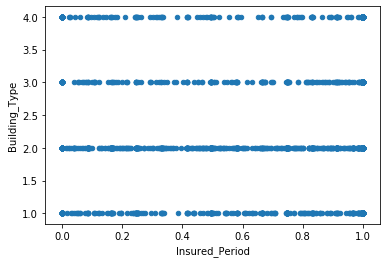

In [290]:
#What is the relationship between Insured_Period and the Building_Type
train.plot.scatter(x='Insured_Period', y = 'Building_Type', legend = False)

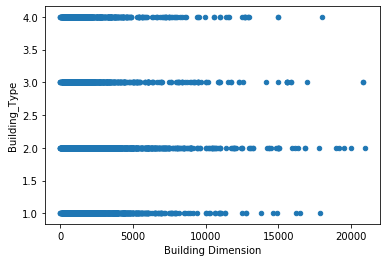

In [291]:
train.plot.scatter(x='Building Dimension', y = 'Building_Type', legend = False)

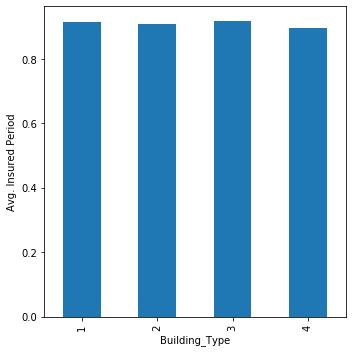

In [292]:
ax = train.groupby('Building_Type').mean().Insured_Period.plot(kind = 'bar', figsize = [5,5])
ax.set_ylabel('Avg. Insured Period')
plt.tight_layout()
plt.show()
                                    

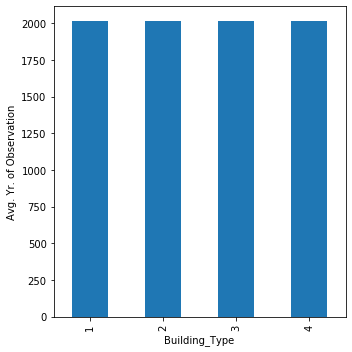

In [293]:
ax = train.groupby('Building_Type').mean().YearOfObservation.plot(kind = 'bar', figsize = [5,5])
ax.set_ylabel('Avg. Yr. of Observation')
plt.tight_layout()
plt.show()
           

**Histogram of Building Type

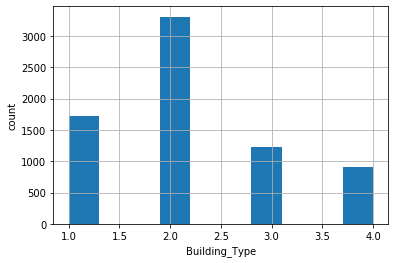

In [294]:
ax = train.Building_Type.hist()
ax.set_xlabel('Building_Type')
ax.set_ylabel('count')

plt.show()

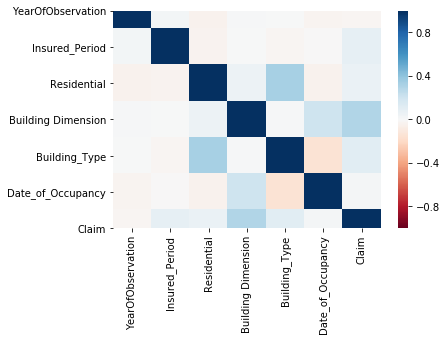

In [295]:
corr = train.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1, cmap="RdBu")

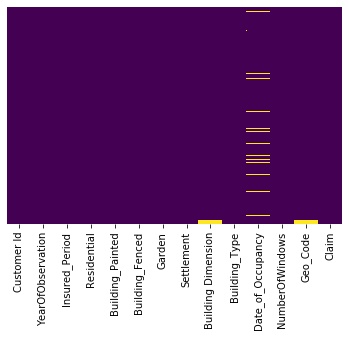

In [296]:
sns.heatmap(train.isnull(), yticklabels = False, cbar= False, cmap = 'viridis')

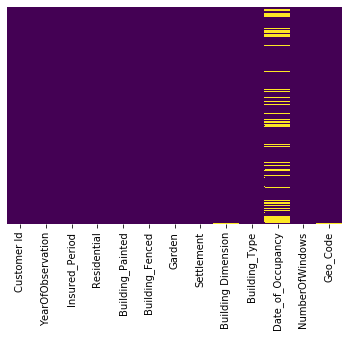

In [297]:
sns.heatmap(test.isnull(), yticklabels = False, cbar= False, cmap = 'viridis')

In [298]:
test.isna().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  4
Settlement              0
Building Dimension     13
Building_Type           0
Date_of_Occupancy     728
NumberOfWindows         0
Geo_Code               13
dtype: int64

In [299]:
train.isna().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [300]:
test.isna().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  4
Settlement              0
Building Dimension     13
Building_Type           0
Date_of_Occupancy     728
NumberOfWindows         0
Geo_Code               13
dtype: int64

In [301]:
mymap = {'   .':0, '>=10':10}

train = train.applymap(lambda s: mymap.get(s) if s in mymap else s)



In [349]:
train.NumberOfWindows.unique()

array([ 0,  4,  3,  2,  5, 10,  6,  7,  9,  8,  1], dtype=int64)

In [302]:
mymap = {'   .':0, '>=10':10}

test = test.applymap(lambda s: mymap.get(s) if s in mymap else s)


In [303]:
test["NumberOfWindows"] = test["NumberOfWindows"].astype(int)

In [304]:
train["NumberOfWindows"] = train["NumberOfWindows"].astype(int)

In [305]:
train.NumberOfWindows.unique()

array([ 0,  4,  3,  2,  5, 10,  6,  7,  9,  8,  1], dtype=int64)

In [306]:
test.NumberOfWindows.unique()

array([ 3,  0,  2,  4,  9,  5,  6,  8, 10,  7,  1], dtype=int64)

In [307]:
train.Claim.isnull().sum()

0

In [308]:
BuildingPainted = pd.get_dummies(test['Building_Painted'], drop_first = True)
BuildingFenced = pd.get_dummies(test['Building_Fenced'], drop_first = True)
garden = pd.get_dummies(test['Garden'], drop_first = True)
settlement = pd.get_dummies(test['Settlement'], drop_first = True)

In [309]:
BuildingPainted = pd.get_dummies(train['Building_Painted'], drop_first = True)
BuildingFenced = pd.get_dummies(train['Building_Fenced'], drop_first = True)
garden = pd.get_dummies(train['Garden'], drop_first = True)
settlement = pd.get_dummies(train['Settlement'], drop_first = True)

In [310]:
train.drop(['Customer Id', 'Building_Painted','Building_Fenced','Geo_Code', 'Settlement','Garden'], axis =1, inplace = True)

In [311]:
test.drop(['Building_Painted','Building_Fenced','Geo_Code', 'Settlement','Garden'], axis =1, inplace = True)

In [312]:
test = pd.concat([test, BuildingPainted, BuildingFenced, garden, settlement], axis = 1)

In [313]:
train = pd.concat([train, BuildingPainted, BuildingFenced, garden, settlement], axis = 1)

In [314]:
test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,V,V,V,U
0,H11920,2013.0,1.000000,0.0,300.0,1.0,1960.0,3.0,0,1,1,1
1,H11921,2016.0,0.997268,0.0,300.0,1.0,1960.0,3.0,1,0,0,0
2,H9805,2013.0,0.369863,0.0,790.0,1.0,1960.0,0.0,0,1,1,1
3,H7493,2014.0,1.000000,0.0,1405.0,1.0,2004.0,3.0,1,1,1,1
4,H7494,2016.0,1.000000,0.0,1405.0,1.0,2004.0,3.0,1,0,0,0


In [315]:
train.head()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Claim,V,V,V,U
0,2013,1.0,0,290.0,1,1960.0,0,0,0,1,1,1
1,2015,1.0,0,490.0,1,1850.0,4,0,1,0,0,0
2,2014,1.0,0,595.0,1,1960.0,0,0,0,1,1,1
3,2013,1.0,0,2840.0,1,1960.0,0,0,1,1,1,1
4,2014,1.0,0,680.0,1,1800.0,3,0,1,0,0,0


In [316]:
train.Claim.isnull().sum()

0

In [317]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer(missing_values=np.nan, strategy = 'most_frequent')
train_imp = pd.DataFrame(my_imputer.fit_transform(train))


In [318]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer(missing_values=np.nan, strategy = 'most_frequent')
test_imp = pd.DataFrame(my_imputer.fit_transform(test))

In [319]:
#Fill in the lines below: Imputation removed column names; put them back
train_imp.columns = train.columns
test_imp.columns = test.columns

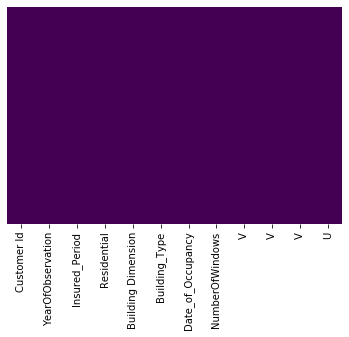

In [320]:
sns.heatmap(test_imp.isnull(), yticklabels = False, cbar= False, cmap = 'viridis')

In [321]:
test_imp.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,V,V,V,U
0,H11920,2013,1,0,300,1,1960,3,0,1,1,1
1,H11921,2016,0.997268,0,300,1,1960,3,1,0,0,0
2,H9805,2013,0.369863,0,790,1,1960,0,0,1,1,1
3,H7493,2014,1,0,1405,1,2004,3,1,1,1,1
4,H7494,2016,1,0,1405,1,2004,3,1,0,0,0


In [322]:
test_imp.isna().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
V                     0
V                     0
V                     0
U                     0
dtype: int64

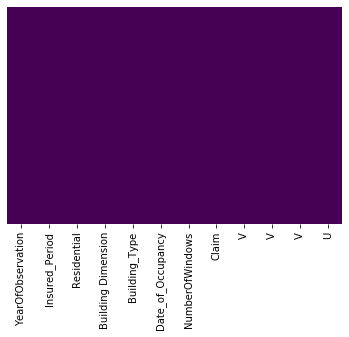

In [323]:
sns.heatmap(train_imp.isnull(), yticklabels = False, cbar= False, cmap = 'viridis')

In [324]:
train_imp.head()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Claim,V,V,V,U
0,2013.0,1.0,0.0,290.0,1.0,1960.0,0.0,0.0,0.0,1.0,1.0,1.0
1,2015.0,1.0,0.0,490.0,1.0,1850.0,4.0,0.0,1.0,0.0,0.0,0.0
2,2014.0,1.0,0.0,595.0,1.0,1960.0,0.0,0.0,0.0,1.0,1.0,1.0
3,2013.0,1.0,0.0,2840.0,1.0,1960.0,0.0,0.0,1.0,1.0,1.0,1.0
4,2014.0,1.0,0.0,680.0,1.0,1800.0,3.0,0.0,1.0,0.0,0.0,0.0


In [325]:
train_imp.columns

Index(['YearOfObservation', 'Insured_Period', 'Residential',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Claim', 'V', 'V', 'V', 'U'],
      dtype='object')

In [326]:
train_imp.NumberOfWindows.isna().sum()

0

Let's train the model using logistic regression

In [327]:
X_test = test_imp.drop('Customer Id', axis = 1)

In [328]:
X = train_imp.drop('Claim', axis = 1)

In [329]:
y = train_imp['Claim']

In [330]:
X.head()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,V,V,V,U
0,2013.0,1.0,0.0,290.0,1.0,1960.0,0.0,0.0,1.0,1.0,1.0
1,2015.0,1.0,0.0,490.0,1.0,1850.0,4.0,1.0,0.0,0.0,0.0
2,2014.0,1.0,0.0,595.0,1.0,1960.0,0.0,0.0,1.0,1.0,1.0
3,2013.0,1.0,0.0,2840.0,1.0,1960.0,0.0,1.0,1.0,1.0,1.0
4,2014.0,1.0,0.0,680.0,1.0,1800.0,3.0,1.0,0.0,0.0,0.0


In [331]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Claim, dtype: float64

In [332]:
X.shape

(7160, 11)

In [333]:
X_test.shape

(7160, 11)

In [334]:

from sklearn.model_selection import train_test_split

In [335]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=101)


In [336]:

from sklearn.linear_model import LogisticRegression

In [337]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\GETHSEMAN\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [338]:
predictions = logmodel.predict(X_val)

In [339]:
from sklearn.metrics import confusion_matrix

In [340]:

accuracy=confusion_matrix(y_val,predictions)

In [341]:

accuracy

array([[1630,   28],
       [ 426,   64]], dtype=int64)

In [342]:
from sklearn.metrics import accuracy_score

In [343]:

accuracy=accuracy_score(y_val,predictions)
accuracy

0.7886405959031657

In [344]:
from sklearn.metrics import classification_report

In [345]:
print(classification_report(y_val,predictions))

              precision    recall  f1-score   support

         0.0       0.79      0.98      0.88      1658
         1.0       0.70      0.13      0.22       490

    accuracy                           0.79      2148
   macro avg       0.74      0.56      0.55      2148
weighted avg       0.77      0.79      0.73      2148



In [346]:
test.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'V', 'V', 'V', 'U'],
      dtype='object')

In [347]:
test_predictions = logmodel.predict(X_test)
output = pd.DataFrame({'Customer Id': test['Customer Id'],
                      'claim': test_predictions})
output.to_csv('submission.csv', index = False)

In [348]:
#Check how to  use XGBboost for classification problems
#Check how to use Catboost for classification problems
#DO EDA
#Build different models and compare results